In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

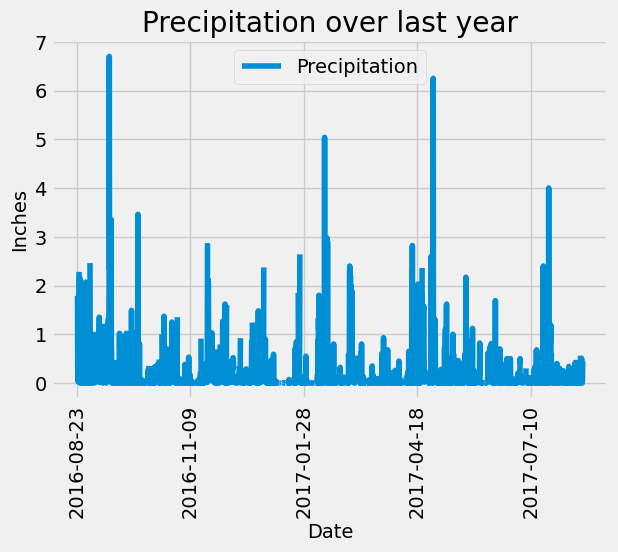

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.
query_date = recent_date - dt.timedelta(days = 366)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, 
                        Measurements.prcp).\
                  filter(Measurements.date > query_date).all()
results
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date' , 'Precipitation'])
df.set_index('Date', inplace=True)
df
# # Sort the dataframe by date
df_sorted = df.sort_values('Date')
df_sorted
# # Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation over last year')
plt.tight_layout()
plt.xticks(rotation = 90)


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurements.station,func.count(Measurements.station)]
session.query(*sel).group_by(Measurements.station).\
        order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_data = session.query(Measurements.station,func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).\
        filter(Measurements.station == 'USC00519281').all()
most_active_station_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

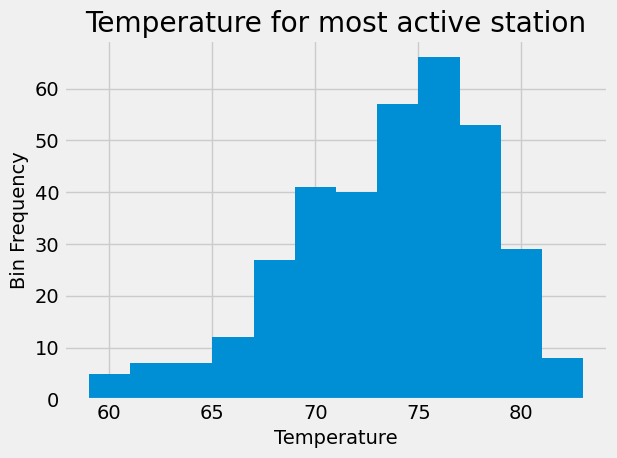

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = recent_date - dt.timedelta(days = 366)
# Perform a query to retrieve the data and precipitation scores
results_station = session.query(Measurements.date, 
                        Measurements.tobs).\
                  filter(Measurements.date > query_date).\
                  filter(Measurements.station == 'USC00519281').all()
results_station
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_station= pd.DataFrame(results_station, columns=['Date' , 'Temperature'])
df_station.set_index('Date', inplace=True)
df_station
# Sort the dataframe by date
df_sorted_station = df_station.sort_values('Date')
df_sorted_station
plt.hist(df_sorted_station['Temperature'], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Bin Frequency')
plt.title('Temperature for most active station')
plt.tight_layout()


# Close Session

In [16]:
# Close Session
session.close()